# Project: Communicate Data Findings

## Introduction
In this project, I perform exploratory data analysis using Python then, create a presentation with explanatory plots that conveys my findings.

I based my work on the Loan Data from Prosper which contains variables on loans including loan amount, credit grade, employment status and the loan status.

In [939]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

## Assessing the data

In [940]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [941]:
df.shape

(113937, 81)

In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [943]:
df.isnull()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [944]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

## Preliminary wrangling

I performed various cleaning steps in order to obtain the data that I needed for my visualizations.

In [945]:
# Obtaining the dataset of interest 
values=['Current','Completed','Defaulted','Chargedoff']
loan = df.query("LoanStatus in @values")#obtaining a dataset based on the values above
loan['LoanStatus'].replace('Chargedoff', 'Defaulted', inplace=True)

C:\Users\joshu\AppData\Local\Temp\ipykernel_21068\3614666422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['LoanStatus'].replace('Chargedoff', 'Defaulted', inplace=True)


In [946]:
# Performing cleaning steps on the employment status column
loan['EmploymentStatus'].replace(['Self-employed', 'Full-time'], ['Employed', 'Employed'], inplace=True)
loan['EmploymentStatus'].replace(['Part-time', 'Retired'], ['Employed', 'Not employed'], inplace=True)
loan['EmploymentStatus'].value_counts()

C:\Users\joshu\AppData\Local\Temp\ipykernel_21068\3713529760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['EmploymentStatus'].replace(['Self-employed', 'Full-time'], ['Employed', 'Employed'], inplace=True)
C:\Users\joshu\AppData\Local\Temp\ipykernel_21068\3713529760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['EmploymentStatus'].replace(['Part-time', 'Retired'], ['Employed', 'Not employed'], inplace=True)


Employed         98784
Not available     5346
Other             3680
Not employed      1598
Name: EmploymentStatus, dtype: int64

In [947]:
loan.shape

(111660, 81)

In [948]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111660 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           111660 non-null  object 
 1   ListingNumber                        111660 non-null  int64  
 2   ListingCreationDate                  111660 non-null  object 
 3   CreditGrade                          28948 non-null   object 
 4   Term                                 111660 non-null  int64  
 5   LoanStatus                           111660 non-null  object 
 6   ClosedDate                           55084 non-null   object 
 7   BorrowerAPR                          111635 non-null  float64
 8   BorrowerRate                         111660 non-null  float64
 9   LenderYield                          111660 non-null  float64
 10  EstimatedEffectiveYield              82581 non-null   float64
 11  EstimatedLoss

## What is the structure of my dataset?
>I started the cleaning with 113937 observations, 81 features. I didn't drop any columns but instead filtered through the values in order to obtain the target dataset. <br /> 
    Once I was done cleaning, there were 111660 observations and 81 features to work with. Most of the variables which I chose to work with were qualitative in nature, with a few being categorical. I also looked at a few quantitative variables such as loan amount and the number of investors.

## What are the main features of interest in your dataset?

>I was mainly concerned with factors that could affect a loan's outcome status such as:
   >* IncomeRange
   >* EmploymentStatus
   >* ProsperScore
    
>I also sought to explore which listing category were investors most likely to finance in terms of loan amount. I also explored to find if there were any factors that determined the original loan amount given. Some of the features which I explored in this respect include:
   >* ScorexChangeAtTimeOfListing
   >* CurrentDelinquencies
   >* EmploymentStatus
   >* IsBorrowerHomeowner
    
>I also sought to explore how willing investores were to finance a loan depending on the verifiability of the income source.

## Univariate Exploration

#### Credit grades

Text(0.5, 0, 'Credit Grade')

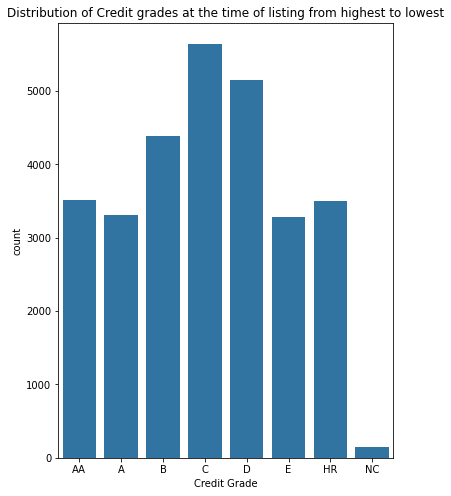

In [949]:
plt.figure(figsize = (6,8))
base_color = sns.color_palette()[0]
ax=sns.countplot(data=loan, x='CreditGrade', color=base_color, order=['AA','A','B','C','D','E','HR','NC'])
ax.set_title("Distribution of Credit grades at the time of listing from highest to lowest", fontsize = 12)
plt.xlabel('Credit Grade')

Text(0.5, 0, 'Credit Grade')

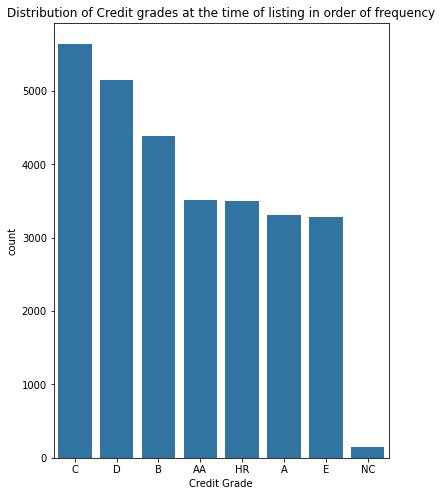

In [950]:
freq = loan['CreditGrade'].value_counts()
loan_order = freq.index
plt.figure(figsize = (6,8))
base_color = sns.color_palette()[0]
ax=sns.countplot(x='CreditGrade', data=loan, color = base_color, order = loan_order)
ax.set_title("Distribution of Credit grades at the time of listing in order of frequency", fontsize = 12)
plt.xlabel('Credit Grade')

* The credit grade that was awarded the most loans was C followed by D
* People with higher credit grades are less compared to people with the median credit scores

#### Loan Prosper Score

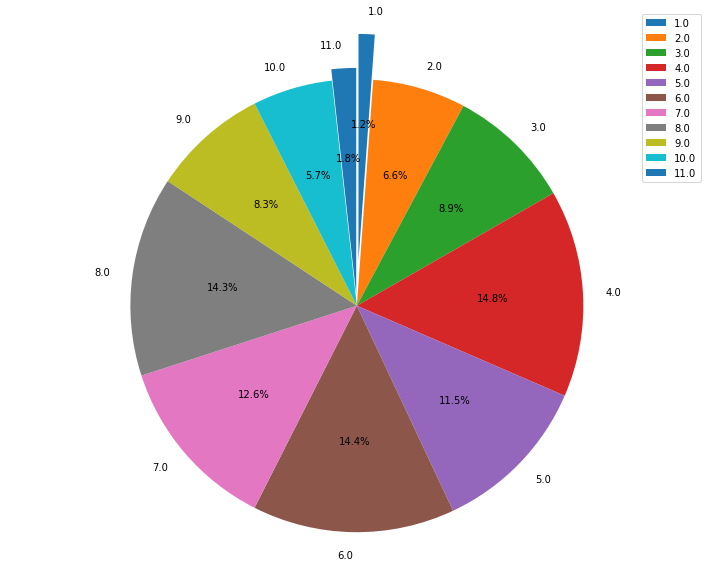

In [951]:
loan.ProsperScore.value_counts()
sizes = loan['ProsperScore'].value_counts().sort_index() / loan['ProsperScore'].value_counts().sum() * 100
plt.figure(figsize=[10,8])
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', explode=[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05], shadow=False, startangle=90, counterclock = False)
plt.axis('equal')
plt.legend(sizes.index, loc="best")
plt.tight_layout()
plt.show()

* The prosper score with the most number of loans is 4.0 followed by 6.0
* People with a prosper score of between 4.0 to 8.0 owe the most loans
* Loans owed tend to decrease as you move from a prosper score of 8.0

In [952]:

loan['Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


#### Occupation

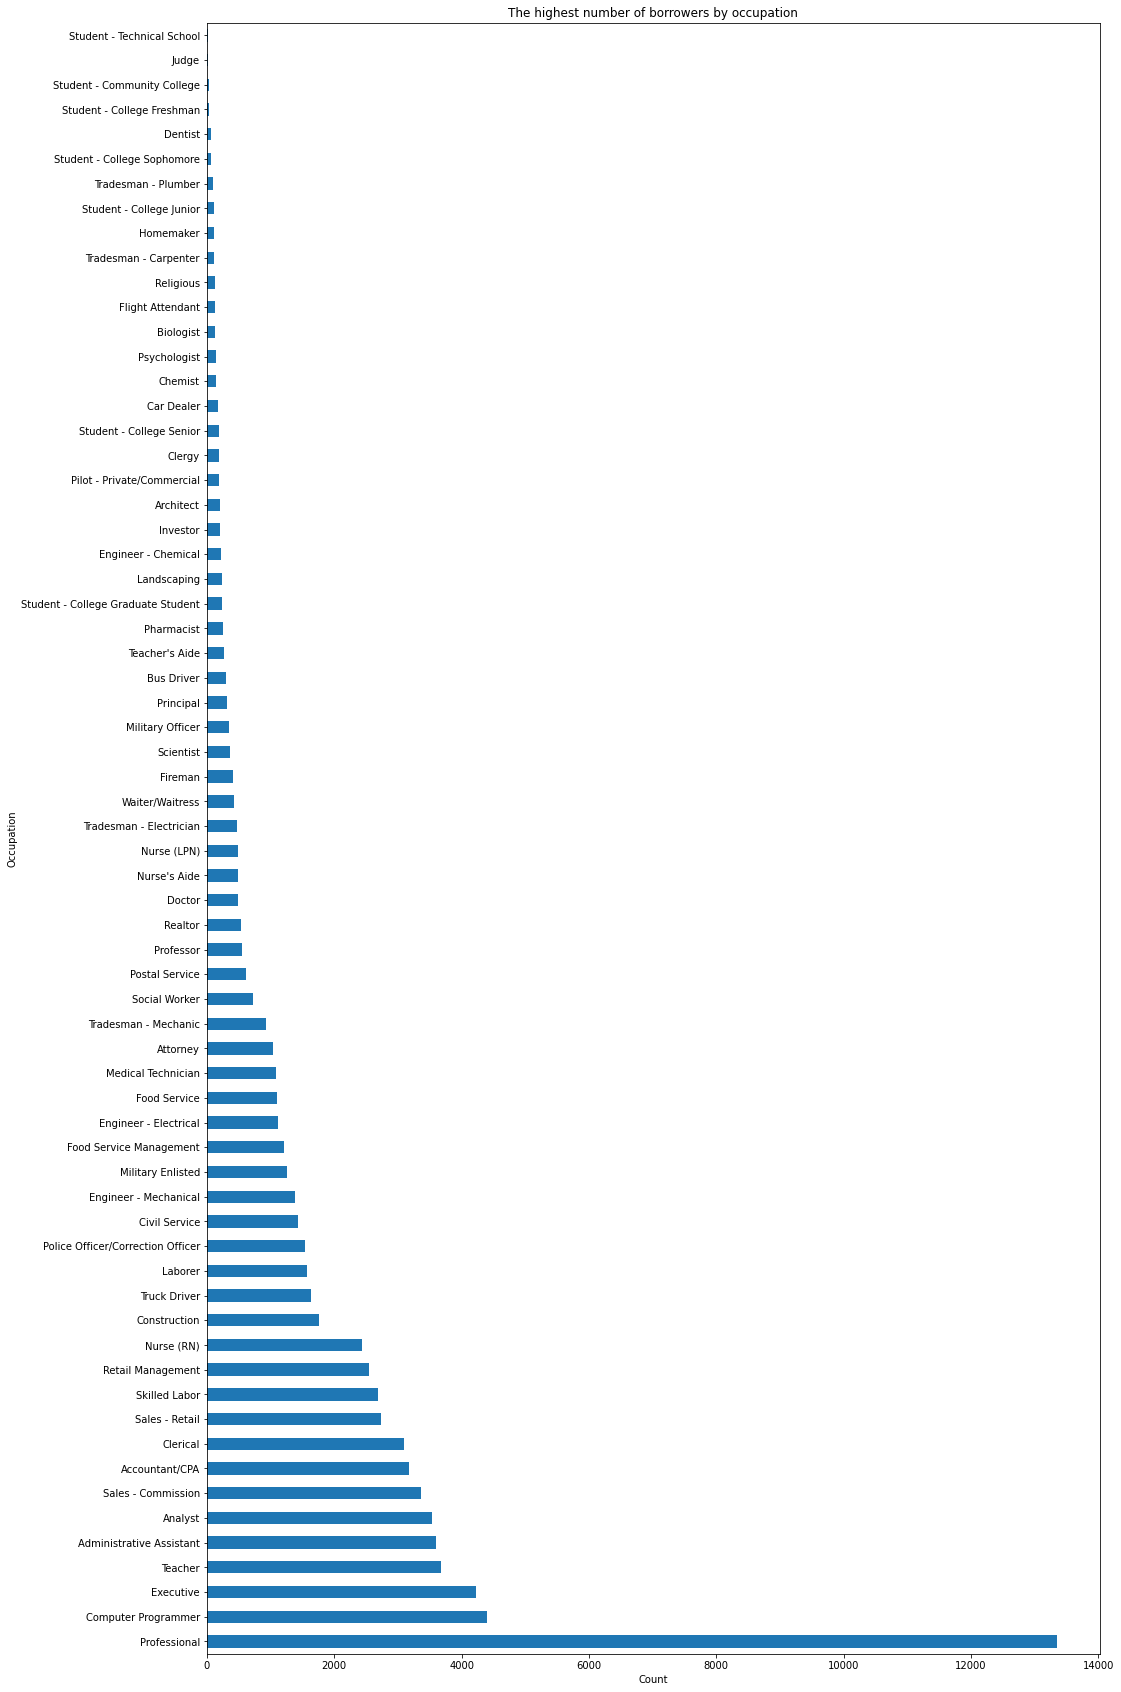

In [953]:
filt = ~(loan['Occupation'] == 'Other')
plt.figure(figsize=[16, 30])
df1 = loan[filt].Occupation.value_counts()
df1.plot(kind= 'barh')
plt.title('The highest number of borrowers by occupation')
plt.xlabel('Count')
plt.ylabel('Occupation');

* People under occupation name 'Professional' took out the most loans followed by computer programmers

#### Employment Status

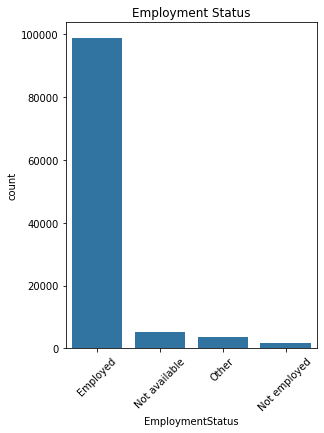

In [954]:
plt.figure(figsize = (4.5,6))
base_color = sns.color_palette()[0]
ax=sns.countplot(x='EmploymentStatus', data=loan, color = base_color)
ax.set_title("Employment Status", fontsize = 12);
plt.xticks(rotation=45);

* Most loanees are employed

#### Loan Status

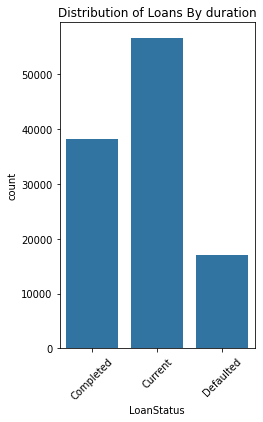

In [955]:
plt.figure(figsize = (3.5,6))
base_color = sns.color_palette()[0]
ax=sns.countplot(x='LoanStatus', data=loan, color = base_color)
ax.set_title("Distribution of Loans By duration", fontsize = 12);
plt.xticks(rotation=45);

* Most loans are current

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>The credit grade that was awarded the most loans was C followed by D. People with higher credit grades have more loans compared to people with the median credit scores. The prosper score with the most number of loans is 4.0 followed by 6.0. People with a prosper score of between 4.0 to 8.0 owe the most loans. Loans owed tend to decrease as you move from a prosper score of 8.0. People under occupation name 'Professional' took out the most loans, which is vague in terms of occupation description but it seems that most investors weren't too concerned about this.
#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>I lumped 'Part-time', 'Full-time' and 'Self-employed' people into the 'Employed' category in order to clearly seperate the unemployed. I also lumped retirees into the 'Not Employed' cataegory.
> I lumped people with a loan status of 'chargedoff' to 'defaulted' as charged off loans are basically defaulted loans.

## Bivariate Exploration

#### Loan Status Vs Income Range

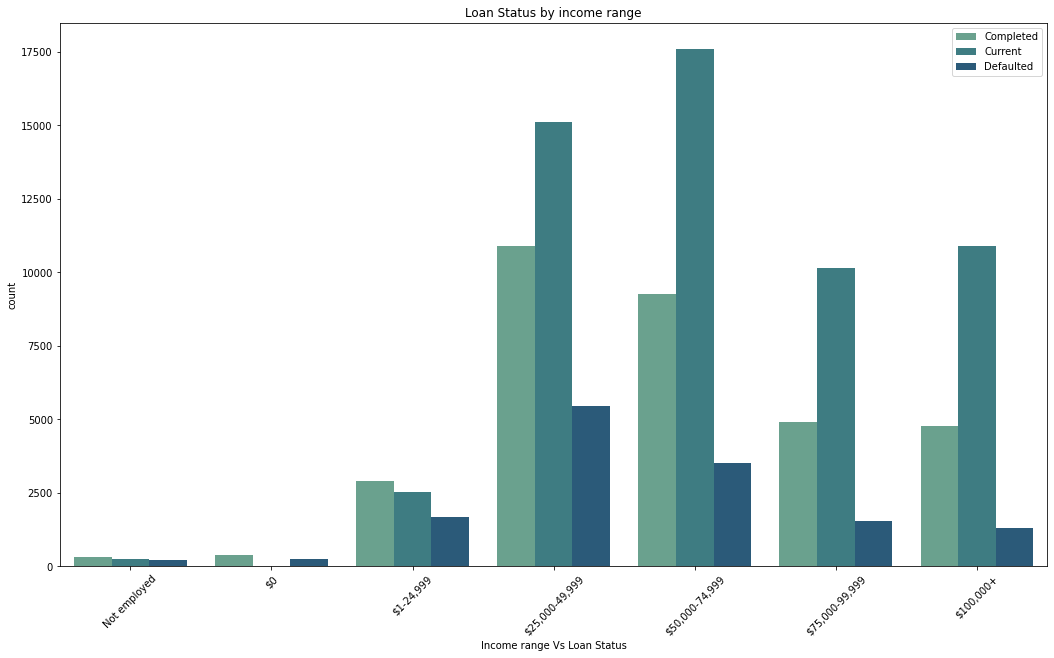

In [956]:
df2 = loan[~(loan['IncomeRange'] == 'Not displayed')]
#dark:#69d_r

plt.figure(figsize = [17.7, 10])
ax=sns.countplot(data = df2, x = 'IncomeRange', hue = 'LoanStatus', palette = 'crest', order=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'])
ax.set_title("Loan Status by income range", fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Income range Vs Loan Status');

* Most current loans are owed by the low-middle income ranges of between 25000-74999
* It seems odd that people that people earning more than 100000 have more current loans than people in the income range between 75000-99999

#### Borrower Interest rate vs Borrower APR

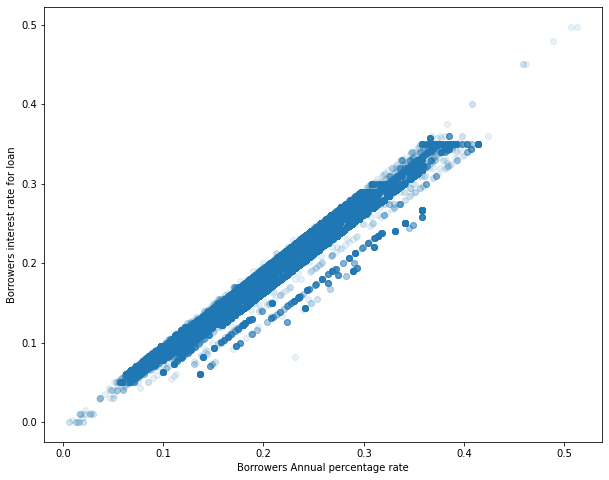

In [957]:
plt.figure(figsize = [10,8])
plt.scatter(data = loan, x = 'BorrowerAPR', y = 'BorrowerRate', alpha=1/10);
plt.xlabel('Borrowers Annual percentage rate')
plt.ylabel('Borrowers interest rate for loan');

* The Borrower APR is directly proportional to the Borrower interest rate

#### Loan Status vs Employment Status

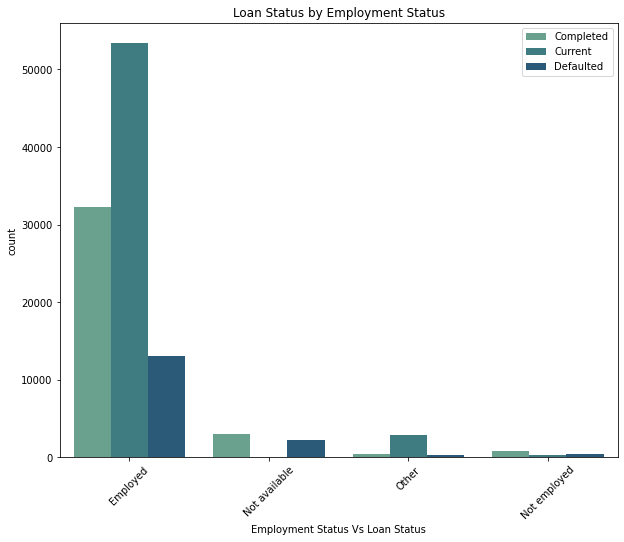

In [958]:
plt.figure(figsize = [10, 8])
ax=sns.countplot(data = loan, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'crest')
ax.set_title("Loan Status by Employment Status", fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Employment Status Vs Loan Status');

* Most loanees are employed

#### Prosper Score Vs Loan Status

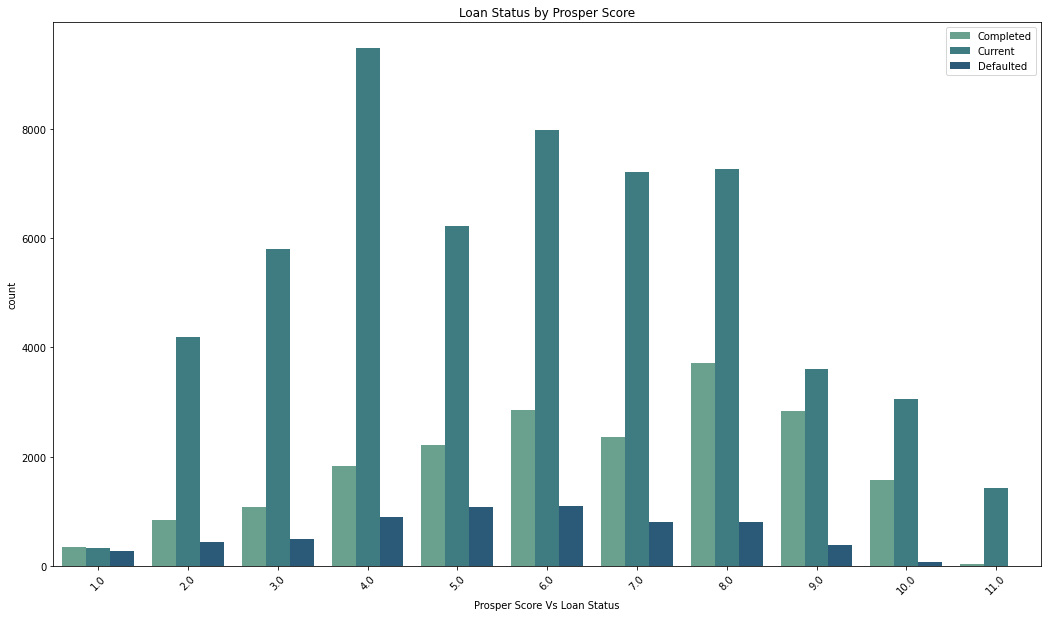

In [959]:
plt.figure(figsize = [17.7, 10])
ax=sns.countplot(data = loan, x = 'ProsperScore', hue = 'LoanStatus', palette = 'crest')
ax.set_title("Loan Status by Prosper Score", fontsize = 12)
plt.legend(loc='upper right')
plt.xticks(rotation=45);
plt.xlabel('Prosper Score Vs Loan Status');

* Most current loans are owed by loanees with a prosper score of 4.0
* Most completed loans are by people with a prosper score of 8.0
* Most likely to default are by people with a prosper score of between 4.0 to 8.0

#### Prosper Score vs Investors

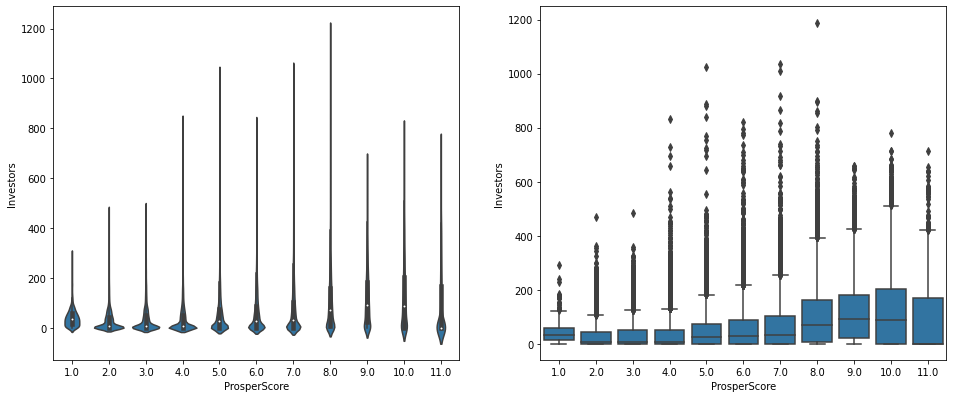

In [960]:
plt.figure(figsize = [16, 6.5])
plt.subplot(1, 2, 1)
ax = sns.violinplot(data=loan, y='Investors', x='ProsperScore', color=base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data=loan, y='Investors', x='ProsperScore', color=base_color);

* People with a prosper score of more than 7.0 are increasingly more likely to get financed by investors 

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> People with a prosper score of more than 7.0 are increasingly more likely to get financed by investors. Most likely to default are by people with a prosper score of between 4.0 to 8.0. Most completed loans are by people with a prosper score of 8.0

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> It seems odd that people that people earning more than 100000 have more current loans than people in the income range between 75000-99999

## Multivariate Exploration

#### Income Range, Investors and Verifiable Income

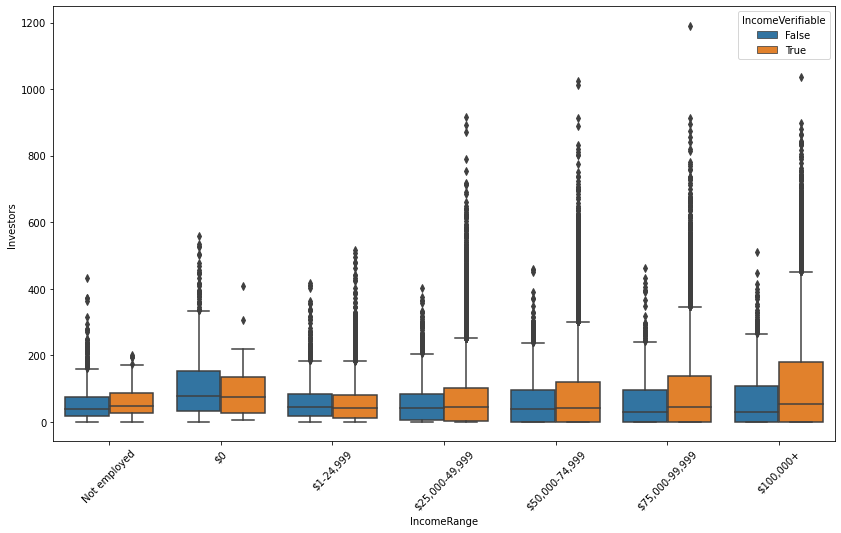

In [961]:
plt.figure(figsize = [14, 8])
sns.boxplot(data=loan, x='IncomeRange', y='Investors', hue='IncomeVerifiable', order=['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'])
plt.xticks(rotation=45);

* People with a verifiable source of income tend to have more investors.
* Income Verifiability seems to increase as you move up the income ranges

#### Employment Status, Investors and Income Verifiability

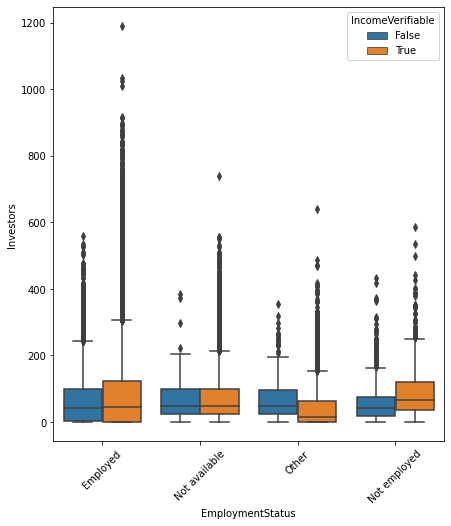

In [962]:
plt.figure(figsize = [7, 8])
sns.boxplot(data=loan, x='EmploymentStatus', y='Investors', hue='IncomeVerifiable')
plt.xticks(rotation=45);

* Employed people seem to attract more investors

#### Scorex Changes at time of listing, Loan Original Amount and Employment Status

D:\Anaconda installation\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


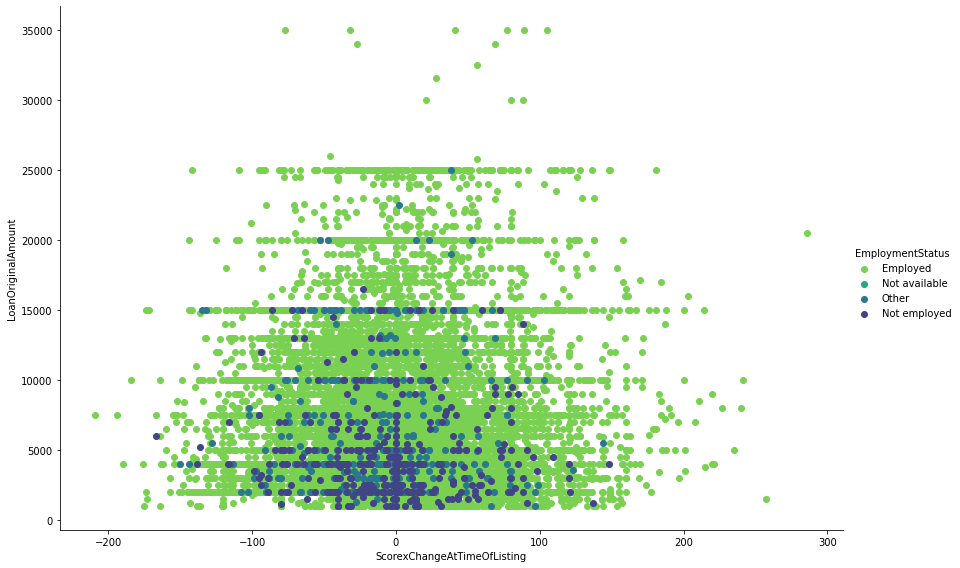

In [963]:
g = sns.FacetGrid(data = loan, hue = 'EmploymentStatus', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'ScorexChangeAtTimeOfListing', 'LoanOriginalAmount')
g.add_legend();
#loan.ScorexChangeAtTimeOfListing.value_counts()

* Employed people tend to get higher loan amounts

#### Current Delinquencies, Loan Original Amount and Employment Status

D:\Anaconda installation\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


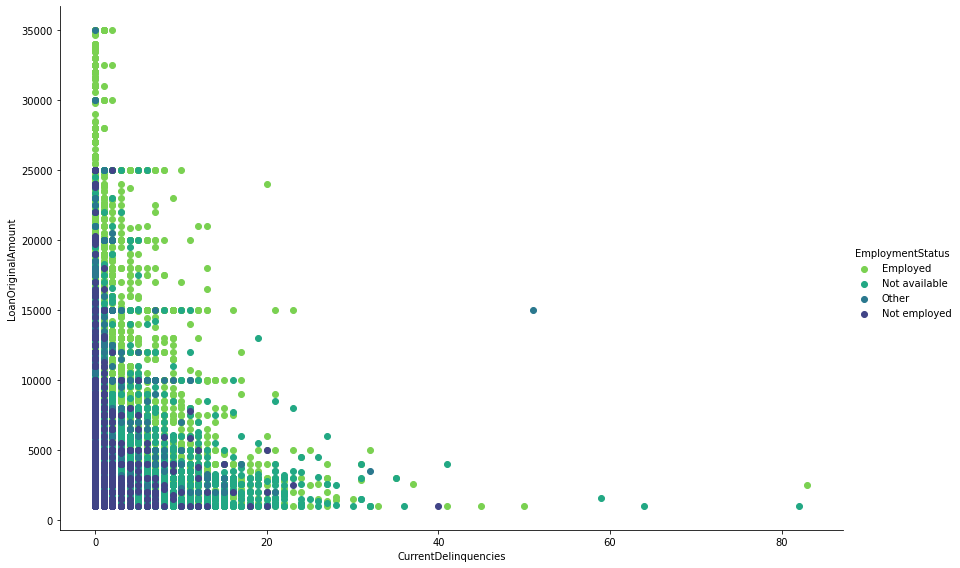

In [964]:
g = sns.FacetGrid(data = loan, hue = 'EmploymentStatus', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'CurrentDelinquencies', 'LoanOriginalAmount')
g.add_legend();

* People with more delinquencies tend to get less loans
* People with less delinquencies tend to get higher loan amounts

#### Investors, Loan Original Amount and Listing Category(numeric)

D:\Anaconda installation\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


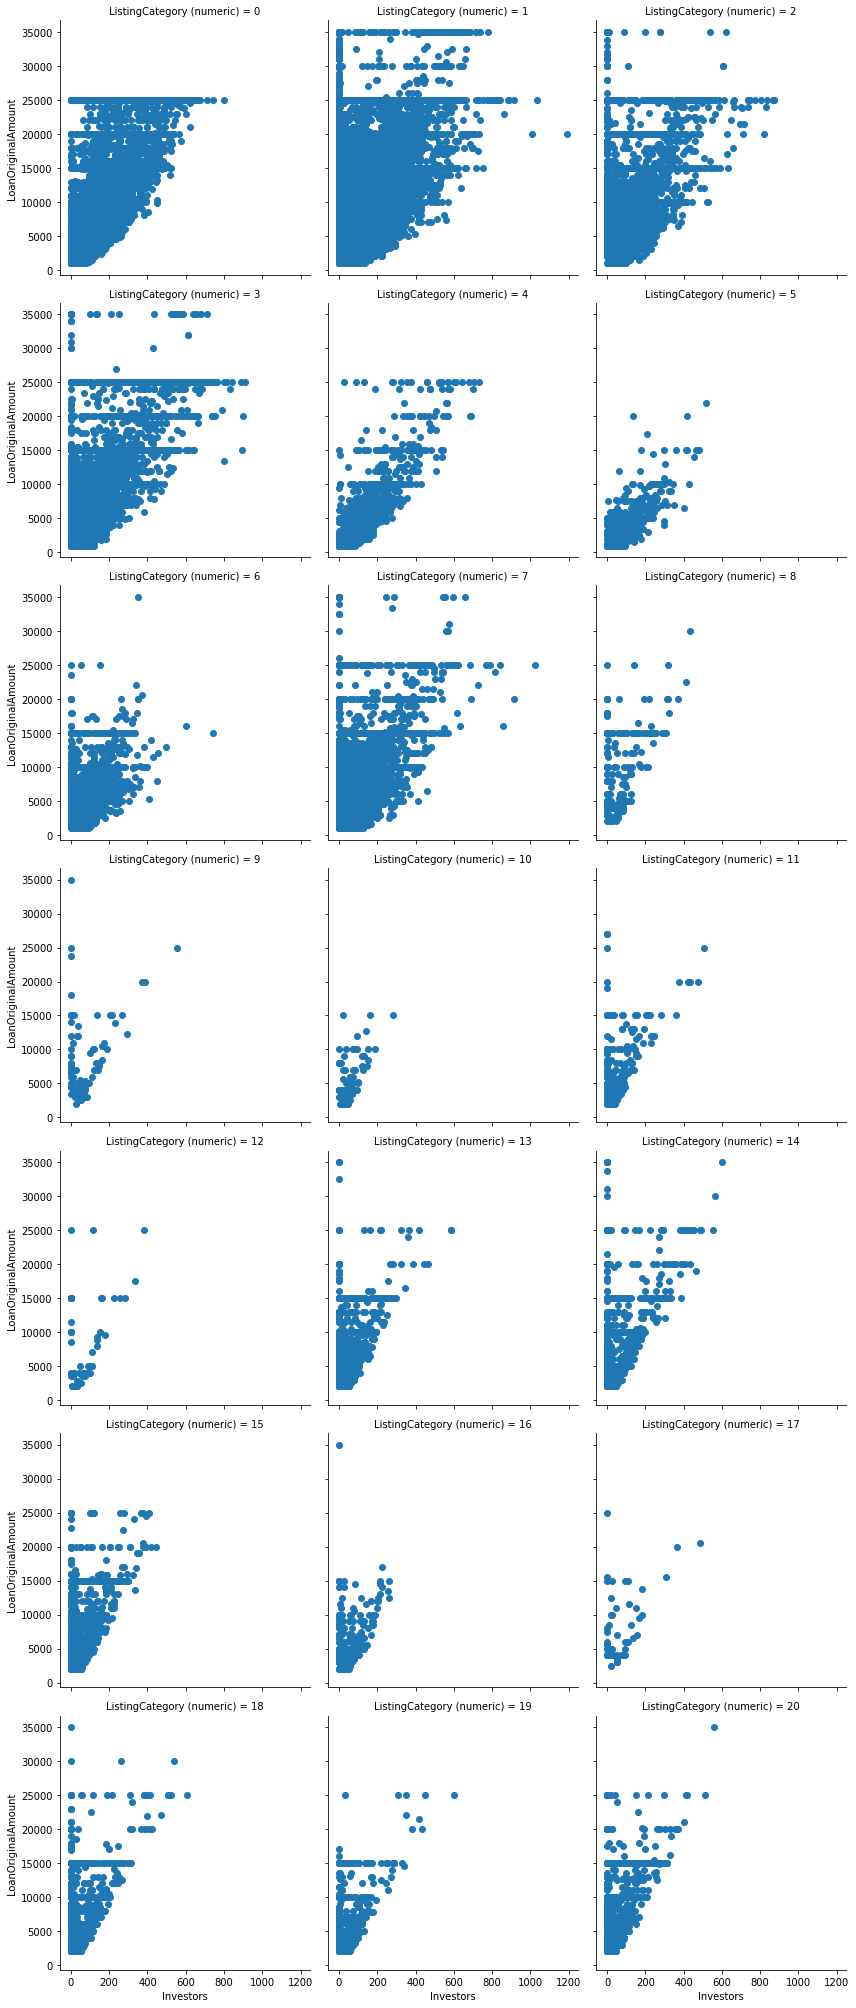

In [965]:
g = sns.FacetGrid(data = loan, col = 'ListingCategory (numeric)', col_wrap = 3, size = 4)
g.map(plt.scatter, 'Investors', 'LoanOriginalAmount');

* Loans of the listing category 1- Debt consolidation seem to be the most; which is alarming

#### Investors, LoanOriginalAmount and IsBorrowerHomeowner

D:\Anaconda installation\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


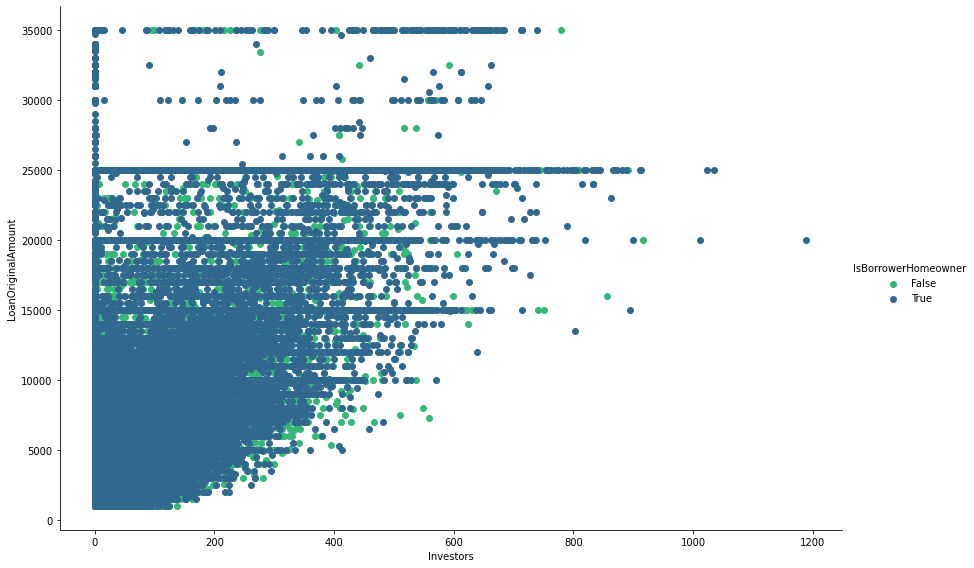

In [966]:
g = sns.FacetGrid(data = loan, hue = 'IsBorrowerHomeowner', size = 8, aspect = 1.5, palette = 'viridis_r')
g.map(plt.scatter, 'Investors', 'LoanOriginalAmount')
g.add_legend();

* Most loanees are home owners.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> It seems that factors such as Prosper score, Credit grade, Income and Employment Status strongly affect the likelihood of a person getting a loan
#### Were there any interesting or surprising interactions between features?
> People took out more loans in order finance their previous loans!